In [1]:
from qiskit import QuantumCircuit
from qiskit import Aer, transpile, assemble

In [2]:
"""
000 -> 001
001 -> 010
010 -> 011
011 -> 100
100 -> 101
101 -> 110
110 -> 111
111 -> 000
"""

'\n000 -> 001\n001 -> 010\n010 -> 011\n011 -> 100\n100 -> 101\n101 -> 110\n110 -> 111\n111 -> 000\n'

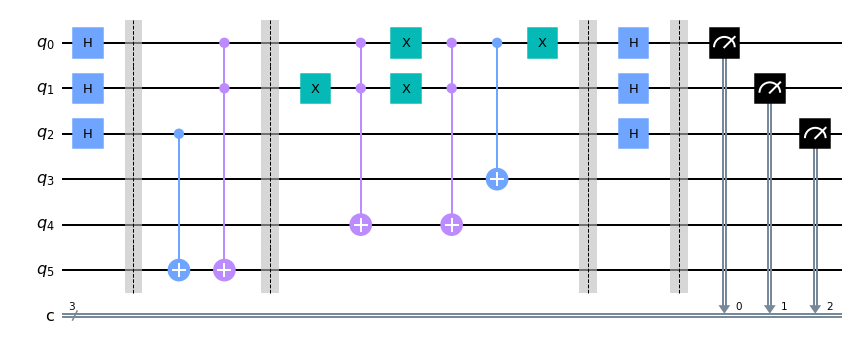

In [3]:
circ = QuantumCircuit(6, 3)

circ.h(0)
circ.h(1)
circ.h(2)
circ.barrier()

circ.cx(2, 5) # if 1xx -> 1xx
circ.ccx(0, 1, 5) # if x11 -> NOTyxx, y = 1 or y = 0 
circ.barrier()

circ.x(1)
circ.ccx(0, 1, 4) # if x11 -> x1x
circ.x(1)

circ.x(0)
circ.ccx(0, 1, 4) # if x00 -> x1x
circ.cx(0, 3) # if xx0 -> xx1
circ.x(0)
circ.barrier()

circ.h(0)
circ.h(1)
circ.h(2)
circ.barrier()

circ.measure(0, 0)
circ.measure(1, 1)
circ.measure(2, 2)

circ.draw(output="mpl")

In [44]:
simulator = Aer.get_backend('qasm_simulator')
telas = assemble(circ, shots=100_000)
results = simulator.run(telas)

hist = results.result().get_counts()
print(hist)

{'101': 12435, '001': 12573, '100': 12627, '110': 12536, '010': 12455, '111': 12696, '000': 12387, '011': 12291}


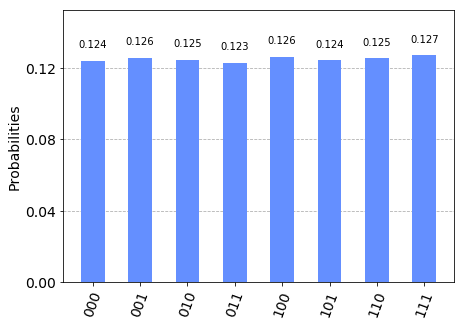

In [45]:
from qiskit.visualization import plot_histogram
plot_histogram(hist)